In [2]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [3]:
# use pandas to import csv file
df = pd.read_csv("datasetForExp4.csv")
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,NaN,17:24:00,4.216,0.418,234.84,18.400,0.000,1.000,17.0
1,NaN,17:25:00,5.360,0.436,233.63,23.000,0.000,1.000,16.0
2,NaN,17:26:00,5.374,0.498,233.29,23.000,0.000,2.000,17.0
3,NaN,17:27:00,5.388,0.502,233.74,23.000,0.000,1.000,17.0
4,NaN,17:28:00,3.666,0.528,235.68,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
10993,NaN,08:37:00,0.198,0.000,242.87,0.800,0.000,0.000,0.0
10994,NaN,08:38:00,2.042,0.000,241.76,8.800,0.000,0.000,0.0
10995,NaN,08:39:00,1.716,0.000,241.95,8.000,0.000,0.000,0.0
10996,NaN,08:40:00,0.266,0.000,243.73,1.800,0.000,0.000,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   0 non-null      float64
 1   Time                   10998 non-null  object 
 2   Global_active_power    10996 non-null  float64
 3   Global_reactive_power  10996 non-null  float64
 4   Voltage                10996 non-null  float64
 5   Global_intensity       10998 non-null  object 
 6   Sub_metering_1         10998 non-null  object 
 7   Sub_metering_2         10998 non-null  object 
 8   Sub_metering_3         10996 non-null  float64
dtypes: float64(5), object(4)
memory usage: 773.4+ KB


In [5]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

Date                     10998
Time                         0
Global_active_power          2
Global_reactive_power        2
Voltage                      2
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3               2
dtype: int64
Missing values distribution: 
Date                     1.000000
Time                     0.000000
Global_active_power      0.000182
Global_reactive_power    0.000182
Voltage                  0.000182
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           0.000182
dtype: float64


In [7]:
#Finding unique values in "Region" 
print(new_df["Voltage"].unique()) 

[234.84 233.63 233.29 ... 248.17 248.16 248.  ]


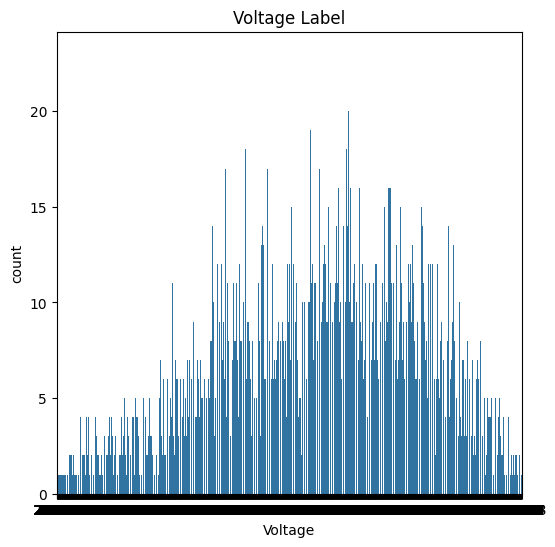

In [8]:
new_df.Voltage.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='Voltage', data=new_df)
plt.title('Voltage Label')
plt.show()

In [9]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [10]:
from sklearn.model_selection import train_test_split
  
# split into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
#KNN classifer
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
#Accuracy and Confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, model.predict(X_test))) 
cm

0.98


array([[ 10,   5],
       [  0, 235]])

In [16]:
#Naive Bayes Classifier
x = new_df.drop(["Voltage"], axis = 1)
y = new_df.Voltage.values
from sklearn.model_selection import train_test_split
  
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes score: ",nb.score(x_test, y_test))

ValueError: Unknown label type: (array([228.91, 229.08, 229.63, ..., 249.07, 249.27, 249.37]),)

In [25]:
new_df = new_df.dropna(subset=["Global_reactive_power","Global_active_power","Voltage"],how="any")

#Did binning to convert continous data to categorical data
new_df['Voltage'] = pd.cut(new_df['Voltage'], bins=5, labels=False)
new_df['Global_reactive_power'] = pd.cut(new_df['Global_reactive_power'], bins=5, labels=False)
new_df['Global_active_power'] = pd.cut(new_df['Global_active_power'], bins=5, labels=False)

#split dataset in features and target variable
feature_cols = ['Global_reactive_power', 'Global_active_power']
X = new_df[feature_cols] # Features
y = new_df.Voltage # Target variable

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5043952712943316
